The aim of the project is to develop a predictive machine learning model that identifies the relationship between production units and sales revenue. This model will enable businesses to forecast sales based on production levels, optimize resource allocation, and maximize revenue generation.


## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load and prepare Data

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
# Check the shape of my data
df.shape

(700, 2)

In [4]:
# Check for missing data
df.isna().sum()

x    0
y    1
dtype: int64

In [5]:
# Fill in missing values
df["y"] = df["y"].fillna(df["y"].median())

In [6]:
df.isna().sum()

x    0
y    0
dtype: int64

In [7]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       700 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [8]:
# Check data description
df.describe()

,x,y
count,700.000000,700.000000
mean,54.985939,49.938488
std,134.681703,29.088411
min,0.000000,-3.839981
25%,25.000000,24.985830
50%,49.000000,48.973020
75%,75.000000,74.880631
max,3530.157369,108.871618


In [9]:
df.select_dtypes(include="float").columns

Index(['x', 'y'], dtype='object')

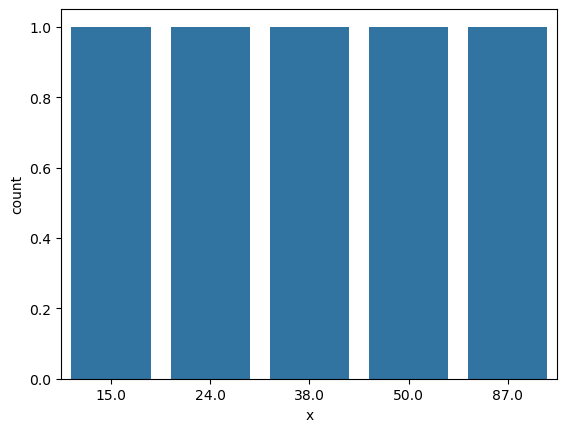

In [72]:
sns.countplot(x='x', data=df.head());

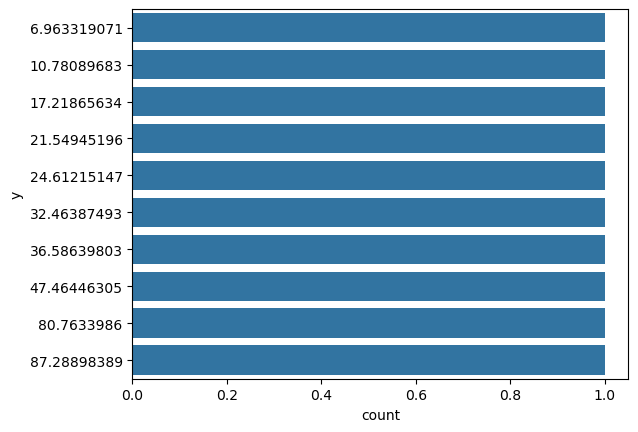

In [70]:
sns.countplot(y='y', data=df[:10]);

In [10]:
df = pd.get_dummies(data = df)
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [11]:
df.corr()

,x,y
x,1.000000,0.212603
y,0.212603,1.000000


## Split data into train and test set

In [12]:
X = df.drop(columns="y")
y = df["y"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state=0)

len(X_train), len(X_test), len(y_train), len(y_test)

(560, 140, 560, 140)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((560, 1), (140, 1), (560,), (140,))

## Model building

In [31]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)

In [32]:
reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [33]:
reg.coef_

array([0.03713377])

In [34]:
reg.intercept_

47.662186087028545

In [35]:
reg.score(X_test, y_test)

0.0697385966322186

## Evaluate model

In [37]:
y_preds = reg.predict(X_test)

In [38]:
msle = mean_squared_log_error(y_test,y_preds)
mae = mean_absolute_error(y_test,y_preds)
r2 = r2_score(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)

In [39]:
print(f"MSLE: {msle:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"r2: {r2:.2f}")

MSLE: 0.62
MAE: 24.48
MSE: 789.95
r2: 0.07


## Model building

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix

In [17]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
model.score(X_test, y_test)

0.989729789247191

In [21]:
y_preds = model.predict(X_test)

In [24]:
msle = mean_squared_log_error(y_test,y_preds)
mae = mean_absolute_error(y_test,y_preds)
r2 = r2_score(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)

## Evaluate model

In [24]:
msle = mean_squared_log_error(y_test,y_preds)
mae = mean_absolute_error(y_test,y_preds)
r2 = r2_score(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)

In [25]:
print(f"MSLE: {msle:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"r2: {r2:.2f}")

MSLE: 0.02
MAE: 2.35
MSE: 8.72
r2: 0.99


### Hyperparameter tuning using RandomizedSearchCV

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [52]:
parameters = {
        "n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_leaf": [1, 2, 4],
        "min_samples_split": [2, 4, 6]
}

In [53]:
random_cv = RandomizedSearchCV(
                           estimator=model,
                           param_distributions=parameters,
                           n_iter=5, # Number of models to try
                           cv=5,
                           verbose=2, 
                           n_jobs=-1, 
)

In [54]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Fawaz Aro\Documents\ML-course\heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fawaz Aro\Documents\ML-course\heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fawaz Aro\Documents\ML-course\heart-disease-project\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Fawaz Aro\Documents\ML-course\heart-disease-proje

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [55]:
random_cv.best_estimator_

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=4, n_estimators=1200)

In [56]:
random_cv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None}

In [57]:
random_cv.best_score_

0.9833059296377131

### Hyperparameter tuning using GridSearchCV

In [28]:
# Using GridSearchCV with our regressor pipeline.
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "n_estimators": [100, 1000],
    "max_depth": [None, 5],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=1000; total time=   0.0s
[CV] END max_dept

C:\Users\Fawaz Aro\Documents\ML-course\heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fawaz Aro\Documents\ML-course\heart-disease-project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fawaz Aro\Documents\ML-course\heart-disease-project\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Fawaz Aro\Documents\ML-course\heart-disease-proje

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 1000]},
             verbose=2)

In [29]:
gs_model.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 1000}

In [30]:
gs_model.score(X_test, y_test)

0.9902429123082451

## Final Model (RandomForestRegressor)

In [58]:
final_model = RandomForestRegressor(max_depth = 5,
                                    max_features = "sqrt",
                                    min_samples_split = 4,
                                    n_estimators = 1000)

In [59]:
final_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_split=4,
                      n_estimators=1000)

In [60]:
y_pred = final_model.predict(X_test)

In [63]:
msle = mean_squared_log_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [64]:
print(f"MSLE: {msle:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"r2: {r2:.2f}")

MSLE: 0.02
MAE: 2.30
MSE: 8.31
r2: 0.99


In [65]:
from sklearn.inspection import permutation_importance
result = permutation_importance(final_model, X, y, n_repeats=10,
                                random_state=0)

In [66]:
result

{'importances_mean': array([1.93954523]),
 'importances_std': array([0.05585004]),
 'importances': array([[1.89512713, 1.88955442, 2.03467072, 2.01049725, 1.91080847,
         2.00423896, 1.8703968 , 1.93096563, 1.95868489, 1.89050802]])}